# Computing the Free Energy - The Harmonic Approximation

In this exercise you will calculate the Gibbs free energy of a MgO crystal. As you will observe, the free energy depends on the number of vibrations that are taken into account. Therefore, the first step is a convergence test wrt the number of k points sampled (like you did in the previous exercise for the DOS).
### GRID CONVERGENCE TEST
Input one by one the grid size *s* you want to use. If you feel confident with python you could write a "for loop" to automatise the procedure. (Hint: a for loop was used in the previous part of the lab for the DOS convergence tests).
<br><br>


In [3]:
# first the imports, always
import numpy as np
import matplotlib.pyplot as plt
from ase.calculators.gulp import GULP
from math import ceil
from ase.spacegroup import crystal
from time import time

# INPUT THE GRID SIZE YOU WANT TO TEST
for k in range(1,21):

# the name of the calculation
    label = 'mgo_G'.format()
#INSTERT HERE THE VALUE FOR THE OPTIMISED LATTICE CONSTANT
    a_opt = 4.212
    MgO_G = crystal('MgO',basis=[[0.0,0.0,0.0],[0.5,0.5,0.5]],spacegroup=225,cellpar=[a_opt, a_opt, a_opt, 90, 90, 90],primitive_cell=True)

#setting the options to run the free energy calculation
    options = ['temperature 0','shrink {} {} {}'.format(k,k,k),'output phon '+label]
    calc = GULP(label=label ,keywords='conp free_energy', library='ionic.lib',options=options)
    calc.set(options = options)
    MgO_G.calc = calc
    b = time()
    MgO_G.get_potential_energy()
    e = time()-b

#read the output
    with open('mgo_G.got') as o:
        lines = o.readlines()

#look for the free energy in the output
    for i,line in enumerate(lines):
        if line.find('  Total free energy          =         ') != -1:
            free_energy = line.split()[4]
            break
    
    print('Gibbs free energy (0 K) {}x{}x{} grid  ='.format(k,k,k),free_energy,'eV/(Unit cell)')
    print('Time to calculate the free energy: ',round(e,4),'s')


Gibbs free energy (0 K) 1x1x1 grid  = -40.90325632 eV/(Unit cell)
Time to calculate the free energy:  0.1406 s
Gibbs free energy (0 K) 2x2x2 grid  = -40.90111098 eV/(Unit cell)
Time to calculate the free energy:  0.1563 s
Gibbs free energy (0 K) 3x3x3 grid  = -40.90098879 eV/(Unit cell)
Time to calculate the free energy:  0.1406 s
Gibbs free energy (0 K) 4x4x4 grid  = -40.90098041 eV/(Unit cell)
Time to calculate the free energy:  0.1562 s
Gibbs free energy (0 K) 5x5x5 grid  = -40.90097949 eV/(Unit cell)
Time to calculate the free energy:  0.1875 s
Gibbs free energy (0 K) 6x6x6 grid  = -40.90097939 eV/(Unit cell)
Time to calculate the free energy:  0.2187 s
Gibbs free energy (0 K) 7x7x7 grid  = -40.90097941 eV/(Unit cell)
Time to calculate the free energy:  0.2812 s
Gibbs free energy (0 K) 8x8x8 grid  = -40.90097944 eV/(Unit cell)
Time to calculate the free energy:  0.3125 s
Gibbs free energy (0 K) 9x9x9 grid  = -40.90097947 eV/(Unit cell)
Time to calculate the free energy:  0.5938 s
G

**Questions:**<br>
1. How does the free energy vary with the grid size? <br>
    - Which grid size is appropriate for calculations accurate to 1 meV, 0.01 meV and 0.0001 meV per cell? <br>
    <br>
1. Would this optimal grid size for MgO be optimal for a calculation on...<br>
    - similar oxide like BaO?<br>
    - metal like Ag?<br>
    - metal like Li?<br>
         *Think about the relation between the real space and the reciprocal space.<br>

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Gibbs Free Energy /eV/(Unit Cell)')

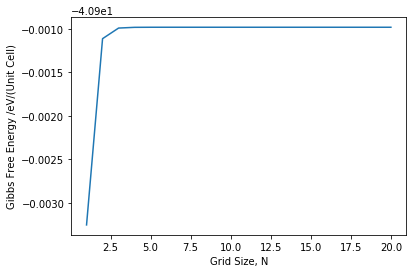

In [1]:
%pylab inline
N=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
G=[-40.90325632, -40.90111098, -40.90098879, -40.90098041, -40.90097949,
   -40.90097939, -40.90097941, -40.90097944, -40.90097947, -40.90097949,
   -40.90097950, -40.90097951, -40.90097951, -40.90097952, -40.90097952,
   -40.90097952, -40.90097952, -40.90097953, -40.90097953, -40.90097953]
plt.plot(N,G)
plt.xlabel('Grid Size, N')
plt.ylabel('Gibbs Free Energy /eV/(Unit Cell)')